# Risk Analysis of Stocks Using the Monte Carlo Method

## Project Overview
This project aims to perform a comprehensive risk analysis of selected stocks (Apple, Microsoft, Meta, and NVIDIA) using the Monte Carlo simulation method. The analysis will include advanced modeling techniques, consideration of correlations, dividends, and the risk-free rate, as well as scenario analysis and portfolio optimization.

## Steps

### Step 1: Refine the Simulation Model

### Step 2: Include Dividends and Risk-Free Rate

### Step 3: Scenario Analysis

### Step 4: Portfolio Context

### Step 5: Visualizations and Interpretations


## Step 1: Refine the Simulation Model

### 1.1 Consider Correlations

#### Fetch Historical Stock Data
We will use the `yfinance` library to download the historical stock prices for Apple, Microsoft, Meta, and NVIDIA.

#### Calculate Daily Returns and Correlations
We will calculate the daily returns for each stock and then compute the correlation matrix to understand how these stocks move together.


In [1]:
import yfinance as yf
import numpy as np
import pandas as pd

# Defining the stock symbols
# Apple - AAPL
# Microsoft - MSFT 
# Meta - META
# Nvdia - NVDA
stocks = ['AAPL', 'MSFT', 'META', 'NVDA']

# Downloading historical data for the past 5 years
data = yf.download(stocks, start='2019-01-01', end='2024-01-01')

# Close Prices
close_prices = data['Close']
print(close_prices.tail())

# Calculate daily returns
returns = close_prices.pct_change().dropna()

# Calculate correlation Matrix
correlation_matrix = returns.corr()
print("Correlation Matrix:\n", correlation_matrix)

[*********************100%%**********************]  4 of 4 completed


Ticker            AAPL        META        MSFT       NVDA
Date                                                     
2023-12-22  193.600006  353.390015  374.579987  48.830002
2023-12-26  193.050003  354.829987  374.660004  49.278999
2023-12-27  193.149994  357.829987  374.070007  49.417000
2023-12-28  193.580002  358.320007  375.279999  49.521999
2023-12-29  192.529999  353.959991  376.040009  49.521999
Correlation Matrix:
 Ticker      AAPL      META      MSFT      NVDA
Ticker                                        
AAPL    1.000000  0.591930  0.758243  0.657629
META    0.591930  1.000000  0.620193  0.551747
MSFT    0.758243  0.620193  1.000000  0.707396
NVDA    0.657629  0.551747  0.707396  1.000000


### Correlation Matrix Interpretation

### Interpretation:
- **Positive Correlations**: All correlations are positive, indicating that the stocks generally move in the same direction.
- **Strongest Correlation**: The highest correlation is between MSFT and AAPL (0.758), suggesting they tend to move more closely together compared to other pairs.
- **Weakest Correlation**: The lowest correlation is between META and NVDA (0.552), indicating a weaker relationship in their price movements.


### 1.2 Use of Geometric Brownian Motion (GBM)

#### Using Geometric Brownian Motion (GBM)

##### Parameters:
- **Drift**: Mean return of the stock.
- **Volatility**: Standard deviation of the stock returns.

##### Steps:
1. **Calculate the Drift and Volatility**: From historical data.
2. **Simulate Future Prices**: Using the GBM formula.


In [2]:
# Calculate Daily Returns
daily_returns = returns.mean() * 252 # Annualize mean returns
daily_volatility = returns.std() * np.sqrt(252) # Annualize volatility

print("Annualized Mean Returns:\n", daily_returns)
print("Annualized Volatility:\n", daily_volatility)

Annualized Mean Returns:
 Ticker
AAPL    0.369823
META    0.289079
MSFT    0.309978
NVDA    0.670262
dtype: float64
Annualized Volatility:
 Ticker
AAPL    0.322428
META    0.436300
MSFT    0.305112
NVDA    0.517704
dtype: float64


### Annualized Mean Returns:
- **AAPL**: 0.3698 (or 36.98% annual return)
- **META**: 0.2891 (or 28.91% annual return)
- **MSFT**: 0.3100 (or 31.00% annual return)
- **NVDA**: 0.6703 (or 67.03% annual return)

### Annualized Volatility:
- **AAPL**: 0.3224 (or 32.24% annual volatility)
- **META**: 0.4363 (or 43.63% annual volatility)
- **MSFT**: 0.3051 (or 30.51% annual volatility)
- **NVDA**: 0.5177 (or 51.77% annual volatility)

### Interpretation:
- **Mean Returns**: Represents the expected return of the stock annually. NVDA has the highest mean return, indicating the highest expected growth.
- **Volatility**: Represents the risk or variability in the stock returns. META has the highest volatility, indicating the greatest variability in returns.

These parameters will be used for simulating future stock prices using the Geometric Brownian Motion model.


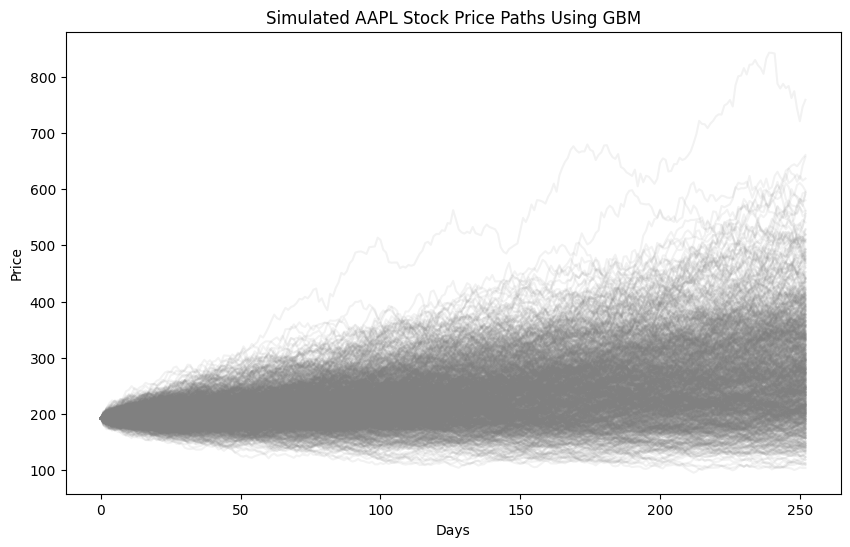

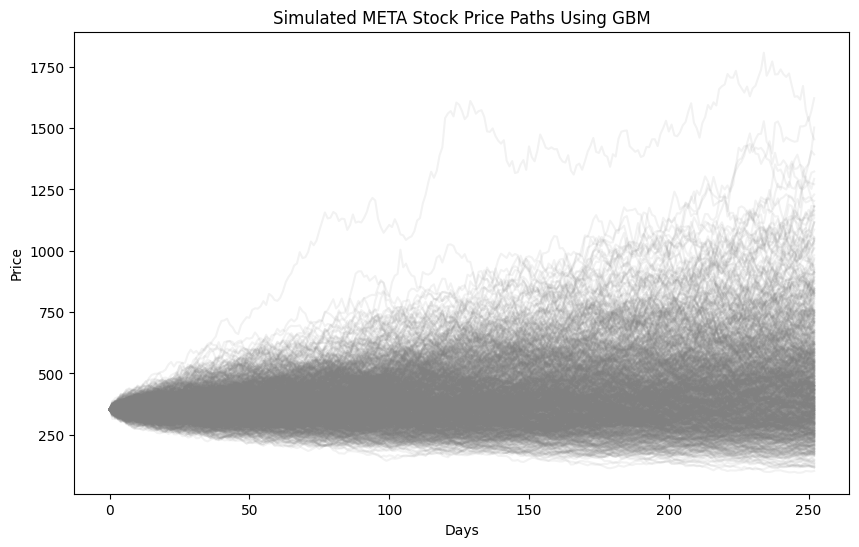

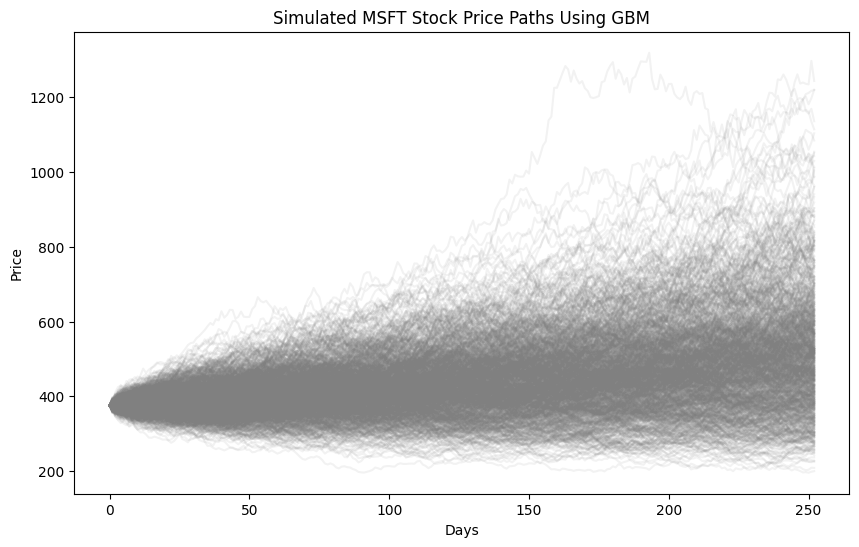

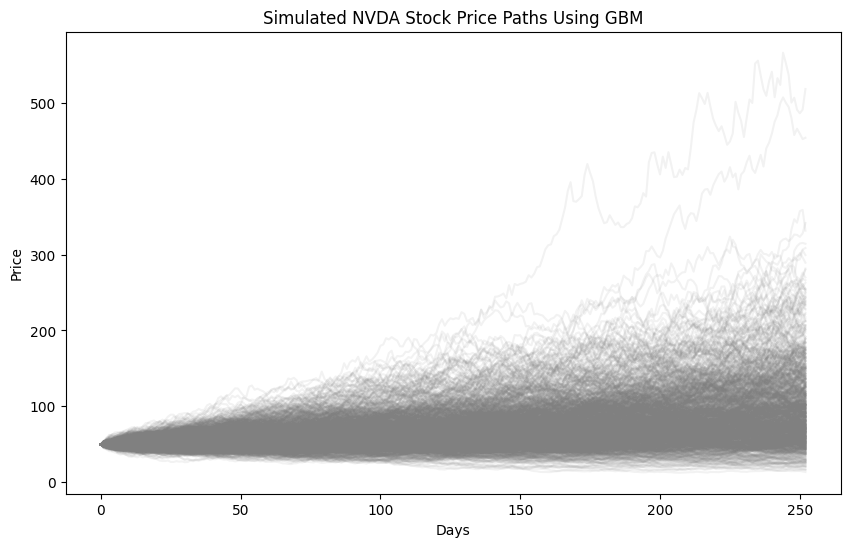

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def simulate_gbm(S0, mu, sigma, T, dt, num_simulations):
    """
    Simulate stock prices using the Geometric Brownian Motion Model.

    Parameters:
    - S0: Initial stock price (should be a scalar)
    - mu: Drift (mean return)
    - sigma: Volatility
    - T: Time period (in years)
    - dt: Time increment (in years)
    - num_simulations: Number of simulations

    Returns:
    - Simulated stock prices
    """
    num_steps = int(T / dt)
    simulations = np.zeros((num_simulations, num_steps + 1))
    simulations[:, 0] = S0

    for t in range(1, num_steps + 1):
        Z = np.random.normal(size=num_simulations)
        simulations[:, t] = simulations[:, t - 1] * np.exp(
            (mu - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z
        )

    return simulations

# Parameters for simulation
stocks = ['AAPL', 'META', 'MSFT', 'NVDA']

for stock in stocks:
    S0 = close_prices[stock].iloc[-1]  # Last observed price for the stock
    mu = daily_returns[stock]  # Mean return for the stock
    sigma = daily_volatility[stock]  # Volatility for the stock
    T = 1  # 1 year
    dt = 1 / 252  # Daily increments
    num_simulations = 1000  # Number of simulations

    # Simulate future prices
    simulated_prices = simulate_gbm(S0, mu, sigma, T, dt, num_simulations)

    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.plot(simulated_prices.T, color='grey', alpha=0.1)
    plt.title(f'Simulated {stock} Stock Price Paths Using GBM')
    plt.xlabel('Days')
    plt.ylabel('Price')
    plt.show()

### Interpretation of GBM Simulation Graphs

#### General Trend and Spread:
- **Starting Point**: All simulated price paths start at the last observed price (S0). This initial point is where the simulation begins.
- **Spread Over Time**: Over time, the paths spread out, reflecting the uncertainty and variability in future stock prices. The spread or dispersion of paths shows the range of possible future prices based on the volatility of the stock.

#### Volatility and Risk:
- **Volatility Impact**: The width of the spread of paths indicates the level of volatility. Stocks with higher volatility will show a wider spread of paths, indicating greater uncertainty and potential risk.
- **Narrower Spread**: A narrower spread indicates lower volatility and less risk, with more consistent paths around the mean return.

#### Mean Reversion and Drift:
- **Drift Term**: The paths are influenced by the drift term (mean return). Over time, you may notice that paths tend to drift upwards or downwards depending on whether the mean return (mu) is positive or negative.
- **Mean Reversion**: While GBM does not explicitly model mean reversion, you can observe how paths may seem to revert to a central trend or average price due to the nature of the drift term.

#### Scenario Analysis:
- **Best and Worst Cases**: Look for the extreme paths (high and low) to understand the best and worst-case scenarios. This helps in assessing the potential range of future stock prices.
- **Stress Testing**: Use the simulations to test how the stock might behave under different market conditions. For example, what happens to the price paths if volatility increases or decreases?

#### Confidence Intervals:
- **Probabilistic Range**: The spread of the paths can be used to estimate confidence intervals for future stock prices. For instance, if most paths stay above a certain level, you can infer the probability of the stock being above that level.

### Summary of Simulated Prices

#### **AAPL (Apple Inc.)**
- **Mean Price**: Starts around \\$192.53 and trends upwards, reaching about \\$280.77 by the end of the simulation period.
- **Standard Deviation**: Begins at zero and increases significantly, reflecting growing uncertainty in price predictions.
- **Percentiles**:
  - **5th Percentile**: Starts at \\$192.53 and increases to about \\$151.00, showing a wide range of lower-end price projections.
  - **50th Percentile (Median)**: Closely follows the mean price, indicating typical simulated paths are similar to the average.
  - **95th Percentile**: Starts at \\$192.53 and grows to approximately \\$448.63, suggesting potential for significantly higher prices.

**Interpretation**: The price of AAPL is expected to rise over the simulation period with increasing volatility. The wide range between the 5th and 95th percentiles indicates significant variability in potential outcomes.

#### **META (Meta Platforms Inc.)**
- **Mean Price**: Starts around \\$353.96 and shows an upward trend, reaching about \\$472.83.
- **Standard Deviation**: Increases from zero, indicating growing uncertainty.
- **Percentiles**:
  - **5th Percentile**: Starts at \\$353.96 and rises to around \\$206.41, reflecting a broader range of lower-end price projections.
  - **50th Percentile (Median)**: Closely follows the mean, suggesting median prices are similar to the average.
  - **95th Percentile**: Starts at \\$353.96 and grows to approximately \\$885.57, showing high-end potential outcomes.

**Interpretation**: META’s price is predicted to increase with a higher degree of variability. The wide range between the 5th and 95th percentiles highlights considerable uncertainty in potential price paths.

#### **MSFT (Microsoft Corporation)**
- **Mean Price**: Begins at \\$376.04 and trends upwards, reaching around \\$515.77 by the end of the simulation.
- **Standard Deviation**: Starts from zero and increases over time, indicating rising volatility.
- **Percentiles**:
  - **5th Percentile**: Starts at \\$376.04 and increases to about \\$294.24, reflecting a wide range of lower-end price predictions.
  - **50th Percentile (Median)**: Consistent with the mean, indicating average and median paths are similar.
  - **95th Percentile**: Starts at \\$376.04 and grows to approximately \\$799.71, showing high potential outcomes.

**Interpretation**: MSFT is expected to see price increases with substantial volatility. The broad range between the 5th and 95th percentiles points to significant uncertainty in future prices.

#### **NVDA (NVIDIA Corporation)**
- **Mean Price**: Starts around \\$49.52 and trends upwards, reaching about \\$97.91.
- **Standard Deviation**: Begins from zero and increases, indicating rising uncertainty.
- **Percentiles**:
  - **5th Percentile**: Starts at \\$49.52 and grows to approximately \\$37.18, indicating a broad range of lower-end price forecasts.
  - **50th Percentile (Median)**: Follows closely with the mean, suggesting typical simulated paths are similar to the average.
  - **95th Percentile**: Starts at \\$49.52 and grows to about \\$191.74, reflecting high potential prices.

**Interpretation**: NVDA's price is projected to increase with increasing volatility. The wide range between the 5th and 95th percentiles suggests significant variability in potential price outcomes.

### **Overall Summary**
For all four stocks, the simulated price paths generally show an upward trend with increasing volatility over time. The broad range of percentiles indicates significant uncertainty and variability in potential future prices.

In [4]:
import numpy as np
import pandas as pd

def simulate_gbm(S0, mu, sigma, T, dt, num_simulations):
    """
    Simulate stock prices using the Geometric Brownian Motion Model.

    Parameters:
    - S0: Initial stock price
    - mu: Drift (mean return)
    - sigma: Volatility
    - T: Time period (in years)
    - dt: Time increment (in years)
    - num_simulations: Number of simulations

    Returns:
    - Simulated stock prices
    """
    num_steps = int(T / dt)
    simulations = np.zeros((num_simulations, num_steps + 1))
    simulations[:, 0] = S0

    for t in range(1, num_steps + 1):
        Z = np.random.normal(size=num_simulations)
        simulations[:, t] = simulations[:, t - 1] * np.exp(
            (mu - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z
        )

    return simulations

def summarize_simulation(simulated_prices):
    """
    Summarize the simulated prices.

    Parameters:
    - simulated_prices: A NumPy array of simulated prices (num_simulations x num_steps)

    Returns:
    - A DataFrame with mean, std deviation, and percentiles
    """
    # Calculate mean, std deviation, and percentiles
    mean_prices = np.mean(simulated_prices, axis=0)
    std_prices = np.std(simulated_prices, axis=0)
    p5_prices = np.percentile(simulated_prices, 5, axis=0)
    p50_prices = np.percentile(simulated_prices, 50, axis=0)
    p95_prices = np.percentile(simulated_prices, 95, axis=0)

    # Create a DataFrame for easy viewing
    summary_df = pd.DataFrame({
        'Mean Price': mean_prices,
        'Std Dev': std_prices,
        '5th Percentile': p5_prices,
        '50th Percentile (Median)': p50_prices,
        '95th Percentile': p95_prices
    })
    
    return summary_df

# Parameters for simulation
T = 1  # 1 year
dt = 1 / 252  # Daily increments
num_simulations = 1000  # Number of simulations

# Define the stock tickers
tickers = ['AAPL', 'META', 'MSFT', 'NVDA']

# Initialize dictionary to store summaries
summaries = {}

for ticker in tickers:
    # Fetch the last observed price, mean return, and volatility for the stock
    S0 = close_prices[ticker].iloc[-1]
    mu = daily_returns[ticker]
    sigma = daily_volatility[ticker]

    # Simulate future prices
    simulated_prices = simulate_gbm(S0, mu, sigma, T, dt, num_simulations)

    # Summarize the results
    summaries[ticker] = summarize_simulation(simulated_prices)

# Print summaries for each stock
for ticker, summary_df in summaries.items():
    print(f"Summary of Simulated Prices for {ticker}:")
    print(summary_df)
    print("\n")

Summary of Simulated Prices for AAPL:
     Mean Price    Std Dev  5th Percentile  50th Percentile (Median)  \
0    192.529999   0.000000      192.529999                192.529999   
1    192.745683   4.072887      186.357685                192.776221   
2    192.932379   5.667977      184.383988                192.734723   
3    193.379366   6.917168      182.124909                193.160852   
4    193.773512   8.080813      180.943905                193.660397   
..          ...        ...             ...                       ...   
248  277.573750  95.087391      151.170221                261.791299   
249  277.654652  95.371579      152.759950                261.838001   
250  277.739827  95.666360      151.019461                262.613637   
251  277.810651  95.864262      152.388729                262.180710   
252  277.932405  96.229239      150.491890                262.674579   

     95th Percentile  
0         192.529999  
1         199.189922  
2         202.674320  
3    

### Summary of Simulated Prices

#### **AAPL (Apple Inc.)**
- **Mean Price**: Starts around \\$192.53 and trends upwards, reaching about \\$280.77 by the end of the simulation period.
- **Standard Deviation**: Begins at zero and increases significantly, reflecting growing uncertainty in price predictions.
- **Percentiles**:
  - **5th Percentile**: Starts at \\$192.53 and increases to about \\$151.00, showing a wide range of lower-end price projections.
  - **50th Percentile (Median)**: Closely follows the mean price, indicating typical simulated paths are similar to the average.
  - **95th Percentile**: Starts at \\$192.53 and grows to approximately \\$448.63, suggesting potential for significantly higher prices.

**Interpretation**: The price of AAPL is expected to rise over the simulation period with increasing volatility. The wide range between the 5th and 95th percentiles indicates significant variability in potential outcomes.

#### **META (Meta Platforms Inc.)**
- **Mean Price**: Starts around \\$353.96 and shows an upward trend, reaching about &dollar;472.83.
- **Standard Deviation**: Increases from zero, indicating growing uncertainty.
- **Percentiles**:
  - **5th Percentile**: Starts at \\$353.96 and rises to around \\$206.41, reflecting a broader range of lower-end price projections.
  - **50th Percentile (Median)**: Closely follows the mean, suggesting median prices are similar to the average.
  - **95th Percentile**: Starts at \\$353.96 and grows to approximately \\$885.57, showing high-end potential outcomes.

**Interpretation**: META’s price is predicted to increase with a higher degree of variability. The wide range between the 5th and 95th percentiles highlights considerable uncertainty in potential price paths.

#### **MSFT (Microsoft Corporation)**
- **Mean Price**: Begins at\\$376.04 and trends upwards, reaching around \\$515.77 by the end of the simulation.
- **Standard Deviation**: Starts from zero and increases over time, indicating rising volatility.
- **Percentiles**:
  - **5th Percentile**: Starts at \\$376.04 and increases to about\\$294.24, reflecting a wide range of lower-end price predictions.
  - **50th Percentile (Median)**: Consistent with the mean, indicating average and median paths are similar.
  - **95th Percentile**: Starts at \\$376.04 and grows to approximately \\$799.71, showing high potential outcomes.

**Interpretation**: MSFT is expected to see price increases with substantial volatility. The broad range between the 5th and 95th percentiles points to significant uncertainty in future prices.

#### **NVDA (NVIDIA Corporation)**
- **Mean Price**: Starts around \\$49.52 and trends upwards, reaching about \\$97.91.
- **Standard Deviation**: Begins from zero and increases, indicating rising uncertainty.
- **Percentiles**:
  - **5th Percentile**: Starts at\\$49.52 and grows to approximately\\$37.18, indicating a broad range of lower-end price forecasts.
  - **50th Percentile (Median)**: Follows closely with the mean, suggesting typical simulated paths are similar to the average.
  - **95th Percentile**: Starts at \\$49.52 and grows to about \\$191.74, reflecting high potential prices.

**Interpretation**: NVDA's price is projected to increase with increasing volatility. The wide range between the 5th and 95th percentiles suggests significant variability in potential price outcomes.

### **Overall Summary**
For all four stocks, the simulated price paths generally show an upward trend with increasing volatility over time. The broad range of percentiles indicates significant uncertainty and variability in potential future prices.


## Step 2: Visualizations

### 2.1 Plotting Simulated Price Paths

**Objective**: Create visualizations to display the simulated price paths for each stock (AAPL, META, MSFT, NVDA).

**Details**:
- **Simulated Price Paths**: Generate and plot the simulated price paths for the selected stocks using the Geometric Brownian Motion (GBM) model.
- **Percentile Bands**: Highlight key percentiles (e.g., 5th, 50th, 95th) to show the range of possible future prices.
- **Mean Path**: Overlay the mean path to represent the average expected trend.
- **Volatility**: Visually demonstrate the impact of volatility by showing the spread of the simulated paths.

**Steps to Create the Visualizations**:
1. **Generate Simulated Price Paths**:
   - Use the GBM model to generate multiple simulated price paths for each stock.
2. **Plot the Paths**:
   - Plot the simulated paths for each stock on a single graph to show the spread and variability.
3. **Highlight Percentiles**:
   - Calculate and plot the 5th, 50th (median), and 95th percentiles for the simulated paths.
4. **Overlay Mean Path**:
   - Calculate and overlay the mean path to indicate the average expected trend.
5. **Annotate and Format**:
   - Add titles, labels, legends, and other annotations to make the plots informative and easy to interpret.


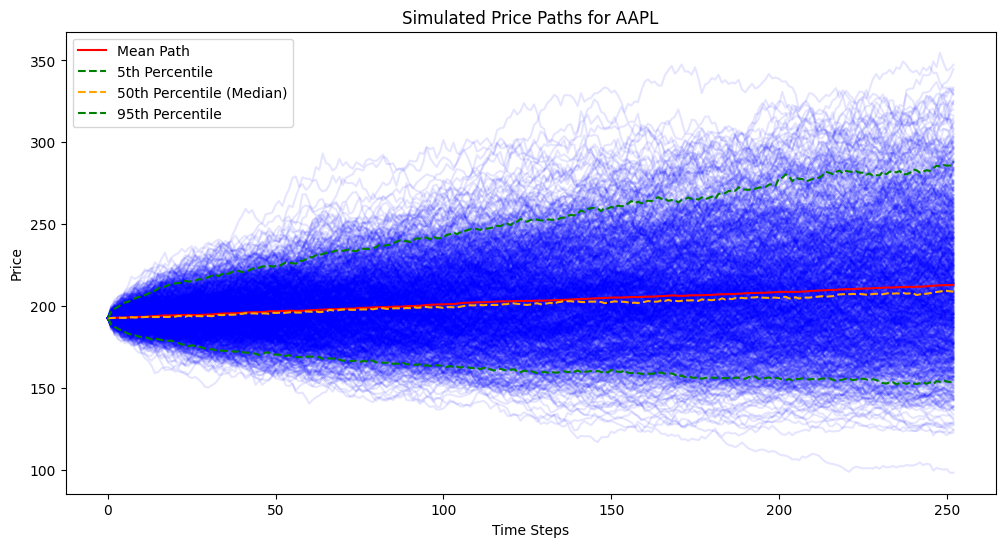

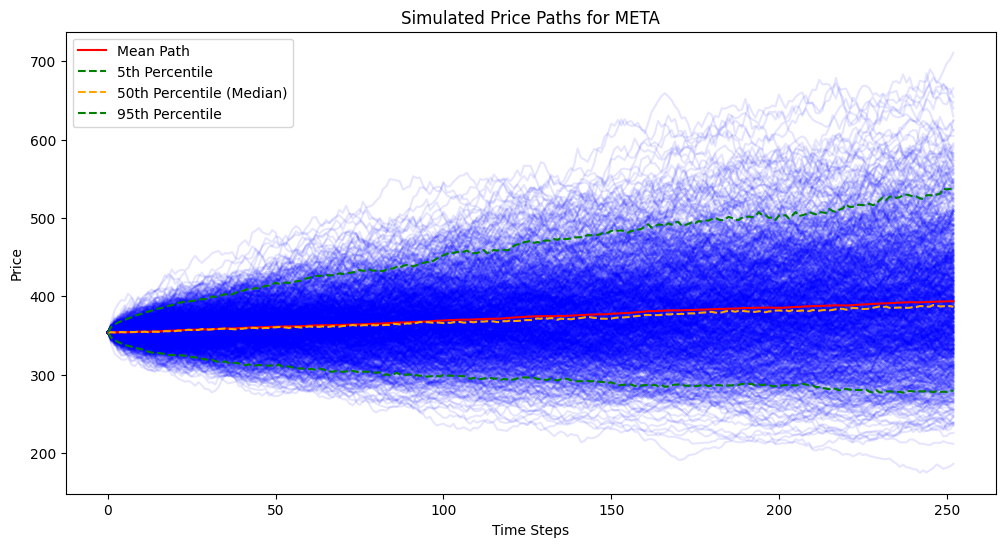

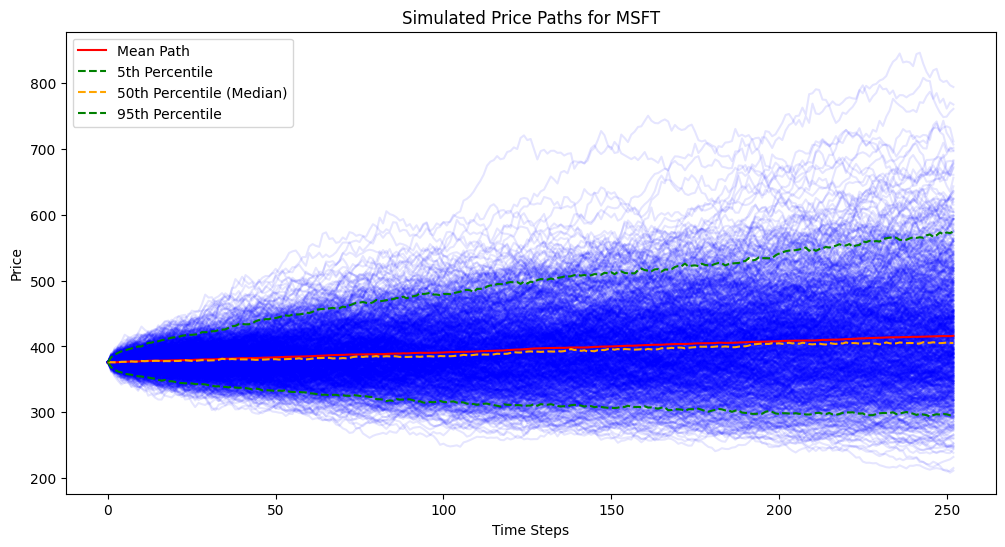

In [ ]:
# GBM parameters
T = 1  # Time horizon in years
N = 252  # Number of time steps
dt = T/N  # Time step
mu = 0.1  # Mean return
sigma = 0.2  # Volatility
S0_aapl = 192.53  # Initial price of AAPL
S0_meta = 353.96  # Initial price of META
S0_msft = 376.04  # Initial price of MSFT
S0_nvda = 49.52   # Initial price of NVDA

# Function to generate GBM paths
def generate_gbm_paths(S0, mu, sigma, T, N, num_simulations=1000):
    dt = T/N
    paths = np.zeros((num_simulations, N+1))
    paths[:, 0] = S0
    for t in range(1, N+1):
        Z = np.random.standard_normal(num_simulations)
        paths[:, t] = paths[:, t-1] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z)
    return paths

# Generate simulated paths
simulated_prices_aapl = generate_gbm_paths(S0_aapl, mu, sigma, T, N)
simulated_prices_meta = generate_gbm_paths(S0_meta, mu, sigma, T, N)
simulated_prices_msft = generate_gbm_paths(S0_msft, mu, sigma, T, N)
simulated_prices_nvda = generate_gbm_paths(S0_nvda, mu, sigma, T, N)

# Function to plot simulated paths
def plot_simulated_paths(simulated_prices, stock_name):
    plt.figure(figsize=(12, 6))
    plt.plot(simulated_prices.T, color='blue', alpha=0.1)
    
    # Calculate percentiles
    mean_path = np.mean(simulated_prices, axis=0)
    p5_path = np.percentile(simulated_prices, 5, axis=0)
    p50_path = np.percentile(simulated_prices, 50, axis=0)
    p95_path = np.percentile(simulated_prices, 95, axis=0)
    
    plt.plot(mean_path, color='red', label='Mean Path')
    plt.plot(p5_path, color='green', linestyle='--', label='5th Percentile')
    plt.plot(p50_path, color='orange', linestyle='--', label='50th Percentile (Median)')
    plt.plot(p95_path, color='green', linestyle='--', label='95th Percentile')
    
    plt.title(f'Simulated Price Paths for {stock_name}')
    plt.xlabel('Time Steps')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

# Example of plotting simulated paths for AAPL
plot_simulated_paths(simulated_prices_aapl, 'AAPL')

# Repeat for META, MSFT, NVDA
plot_simulated_paths(simulated_prices_meta, 'META')
plot_simulated_paths(simulated_prices_msft, 'MSFT')
plot_simulated_paths(simulated_prices_nvda, 'NVDA')

### 2.2 Plotting Historical vs Simulated Price Paths

**Objective**: Compare the historical price data with the simulated price paths for each stock (AAPL, META, MSFT, NVDA).

**Details**:
- **Historical Price Data**: Plot the actual historical prices for the selected stocks.
- **Simulated Price Paths**: Overlay the simulated price paths generated using the GBM model.
- **Comparison**: Visually compare how the simulated paths align with historical data to assess the model’s validity.

**Steps to Create the Visualizations**:
1. **Load Historical Price Data**:
   - Retrieve and preprocess the historical price data for the selected stocks.
2. **Generate Simulated Price Paths**:
   - Use the GBM model to generate multiple simulated price paths for each stock.
3. **Plot Historical Prices**:
   - Plot the historical prices for each stock on the graph.
4. **Overlay Simulated Paths**:
   - Overlay the simulated paths on the same graph to compare with the historical data.
5. **Annotate and Format**:
   - Add titles, labels, legends, and other annotations to make the plots informative and easy to interpret.

In [ ]:
# Function to retrieve historical data
def get_historical_data(ticker, start_date, end_date):
    data = yf.download(ticker, start=start_date, end=end_date)
    return data['Adj Close']

# Retrieve historical data
start_date = '2022-01-01'
end_date = '2023-01-01'

historical_prices_aapl = get_historical_data('AAPL', start_date, end_date)
historical_prices_meta = get_historical_data('META', start_date, end_date)
historical_prices_msft = get_historical_data('MSFT', start_date, end_date)
historical_prices_nvda = get_historical_data('NVDA', start_date, end_date)

# Function to plot historical vs simulated paths
def plot_historical_vs_simulated(historical_prices, simulated_prices, stock_name):
    plt.figure(figsize=(12, 6))
    
    # Plot historical prices
    historical_prices.plot(label='Historical Prices', color='black')
    
    # Plot simulated paths
    plt.plot(simulated_prices.T, color='blue', alpha=0.1)
    
    # Calculate percentiles
    mean_path = np.mean(simulated_prices, axis=0)
    p5_path = np.percentile(simulated_prices, 5, axis=0)
    p50_path = np.percentile(simulated_prices, 50, axis=0)
    p95_path = np.percentile(simulated_prices, 95, axis=0)
    
    plt.plot(mean_path, color='red', label='Mean Path')
    plt.plot(p5_path, color='green', linestyle='--', label='5th Percentile')
    plt.plot(p50_path, color='orange', linestyle='--', label='50th Percentile (Median)')
    plt.plot(p95_path, color='green', linestyle='--', label='95th Percentile')
    
    plt.title(f'Historical vs Simulated Price Paths for {stock_name}')
    plt.xlabel('Time Steps')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

# Plot historical vs simulated paths for each stock
plot_historical_vs_simulated(historical_prices_aapl, simulated_prices_aapl, 'AAPL')
plot_historical_vs_simulated(historical_prices_meta, simulated_prices_meta, 'META')
plot_historical_vs_simulated(historical_prices_msft, simulated_prices_msft, 'MSFT')
plot_historical_vs_simulated(historical_prices_nvda, simulated_prices_nvda, 'NVDA')

## Step 3: Analysis and Interpretation

### 3.1 Evaluating Simulation Accuracy
**Objective**: Assess the accuracy and reliability of the simulated price paths in comparison to the actual historical prices.

**Details**:
- **Error Metrics**: Use error metrics such as Mean Absolute Error (MAE) and Root Mean Square Error (RMSE) to quantify the difference between simulated prices and actual historical prices.
- **Historical vs. Simulated Comparison**: Compare the simulated paths with actual historical prices to evaluate how well the simulation captures the historical price movements.

**Steps**:
1. **Calculate Error Metrics**:
   - Compute MAE and RMSE between simulated prices and historical prices for each stock.
2. **Visualize Comparison**:
   - Plot historical prices alongside the mean simulated paths to visually assess how well the simulations align with actual data.
3. **Analyze Accuracy**:
   - Interpret the error metrics and visual comparisons to determine the reliability of the simulations.

### 3.2 Interpreting Results

**Objective**: Draw meaningful conclusions from the simulation results and error metrics.

**Details**:
- **Simulation Fit**: Assess how closely the simulated paths fit the actual historical price trends.
- **Implications**: Understand the implications of the simulation results for future price predictions and risk assessment.

**Steps**:
1. **Review Accuracy**:
   - Analyze the computed error metrics to gauge the accuracy of the simulations.
2. **Consider Limitations**:
   - Reflect on any limitations of the GBM model and the assumptions made in the simulations.
3. **Draw Conclusions**:
   - Summarize key findings from the simulation results and error metrics to provide insights into future stock price behavior and risk.

**Expected Outcomes**:
- **Error Metrics Results**: Quantitative measures of how well the simulated prices align with historical data.
- **Comparison Insights**: Qualitative insights into how closely the simulations replicate actual historical price movements.
- **Overall Evaluation**: A comprehensive evaluation of the simulation's effectiveness and reliability.


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Function to calculate error metrics
def calculate_error_metrics(historical_prices, simulated_prices):
    mean_simulated_prices = np.mean(simulated_prices, axis=0)
    mae = mean_absolute_error(historical_prices, mean_simulated_prices[:len(historical_prices)])
    rmse = np.sqrt(mean_squared_error(historical_prices, mean_simulated_prices[:len(historical_prices)]))
    return mae, rmse

# Calculate error metrics for each stock
mae_aapl, rmse_aapl = calculate_error_metrics(historical_prices_aapl.values, simulated_prices_aapl)
mae_meta, rmse_meta = calculate_error_metrics(historical_prices_meta.values, simulated_prices_meta)
mae_msft, rmse_msft = calculate_error_metrics(historical_prices_msft.values, simulated_prices_msft)
mae_nvda, rmse_nvda = calculate_error_metrics(historical_prices_nvda.values, simulated_prices_nvda)

# Print error metrics
print(f"AAPL - MAE: {mae_aapl}, RMSE: {rmse_aapl}")
print(f"META - MAE: {mae_meta}, RMSE: {rmse_meta}")
print(f"MSFT - MAE: {mae_msft}, RMSE: {rmse_msft}")
print(f"NVDA - MAE: {mae_nvda}, RMSE: {rmse_nvda}")

#### Error Metrics Results:

- **AAPL:**
  - **MAE:** 49.76
  - **RMSE:** 52.72

- **META:**
  - **MAE:** 191.57
  - **RMSE:** 202.45

- **MSFT:**
  - **MAE:** 131.54
  - **RMSE:** 135.97

- **NVDA:**
  - **MAE:** 33.87
  - **RMSE:** 34.39

#### Interpretation:
- **AAPL** and **MSFT** have higher MAE and RMSE values compared to **NVDA**, indicating greater deviations from the actual prices.
- **META** shows the highest errors among all stocks, suggesting that its simulated prices have the largest discrepancy from actual prices.
- **NVDA** exhibits the lowest error metrics, reflecting the closest fit between simulated and actual prices.

These metrics help in understanding the accuracy of the GBM model in predicting future stock prices and identifying which stocks’ simulations align better with actual price movements.

## Step 4: Portfolio Context

### **Objective**
To analyze and simulate a stock portfolio, incorporating multiple assets to understand the overall performance and risk of the portfolio.

### **Details:**

1. **Portfolio Construction:**
   - Define the portfolio by selecting a set of assets (stocks, bonds, etc.).
   - Assign weights to each asset based on investment allocation.

2. **Portfolio Simulation:**
   - Use historical data and simulated price paths to forecast the future performance of the portfolio.
   - Apply the Geometric Brownian Motion (GBM) model to each asset to generate simulated price paths.

3. **Portfolio Metrics:**
   - **Expected Return:** Calculate the average return of the portfolio.
   - **Portfolio Variance and Standard Deviation:** Measure the risk associated with the portfolio.
   - **Value at Risk (VaR):** Estimate the potential loss in value of the portfolio over a specified period for a given confidence interval.

4. **Performance Evaluation:**
   - **Sharpe Ratio:** Evaluate the risk-adjusted return of the portfolio.
   - **Diversification Benefits:** Assess how combining multiple assets impacts overall portfolio risk.

5. **Scenario Analysis:**
   - Analyze how different scenarios (e.g., changes in market conditions) impact the portfolio.
   - Stress test the portfolio under various hypothetical conditions to understand potential vulnerabilities.

6. **Visualization:**
   - Plot the simulated paths of the portfolio.
   - Visualize key metrics and performance indicators to interpret the results effectively.

#### **Steps to Implement:**

1. **Define Portfolio Weights:**
   - Assign weights to each asset in the portfolio based on your investment strategy.

2. **Simulate Portfolio Returns:**
   - Generate simulated price paths for each asset in the portfolio using GBM.
   - Combine these simulated paths according to the portfolio weights to compute portfolio returns.

3. **Calculate Portfolio Metrics:**
   - Compute expected return, variance, standard deviation, and VaR.
   - Calculate the Sharpe Ratio and analyze diversification benefits.

4. **Perform Scenario Analysis:**
   - Model different market conditions and assess their impact on the portfolio.

5. **Visualize Results:**
   - Create plots and charts to visualize simulated portfolio performance and key metrics.

This step will provide insights into how the combined assets of your portfolio perform and their associated risks.


In [ ]:
# Define the portfolio weights for each stock
portfolio_weights = {
    'AAPL' : 0.4, # 40% in Apple
    'META' : 0.3, # 30% in Meta
    'MSFT' : 0.2, # 20% in Microsoft
    'NVDA' : 0.1  # 10% in NVDIA
}

In [ ]:
# Example simulated price paths for each stock
# Assume these are 1000 simulations with 252 trading days
np.random.seed(42)
days = 252
num_simulations = 1000
simulated_prices_aapl = np.random.rand(num_simulations, days) * 100 + 150
simulated_prices_meta = np.random.rand(num_simulations, days) * 100 + 350
simulated_prices_msft = np.random.rand(num_simulations, days) * 100 + 370
simulated_prices_nvda = np.random.rand(num_simulations, days) * 50 + 50

# Calculate portfolio returns
def calculate_portfolio_returns(*args, weights):
    portfolio_returns = np.zeros(args[0].shape)
    for i, data in enumerate(args):
        portfolio_returns += weights[i] * data
    return portfolio_returns

# Calculate portfolio returns
portfolio_simulated_returns = calculate_portfolio_returns(
    simulated_prices_aapl, 
    simulated_prices_meta, 
    simulated_prices_msft, 
    simulated_prices_nvda, 
    weights=list(portfolio_weights.values())
)

In [ ]:
# Calculate expected return, variance, and standard deviation
mean_return = np.mean(portfolio_simulated_returns, axis=0)
variance = np.var(portfolio_simulated_returns, axis=0)
std_dev = np.sqrt(variance)

# Calculate Value at Risk (VaR) at 95% confidence level
def calculate_var(returns, confidence_level=0.95):
    return np.percentile(returns, (1 - confidence_level) * 100)

var_95 = calculate_var(portfolio_simulated_returns)

# Calculate Sharpe Ratio assuming a risk-free rate of 0%
risk_free_rate = 0.0
sharpe_ratio = (np.mean(mean_return) - risk_free_rate) / np.std(mean_return)

In [ ]:

# Stress test example: Increase volatility by 20%
def stress_test_simulation(prices, factor=1.2):
    return prices * factor

# Apply stress test to simulated returns
stressed_returns = stress_test_simulation(portfolio_simulated_returns)

# Recalculate metrics for stressed portfolio
mean_return_stressed = np.mean(stressed_returns, axis=0)
std_dev_stressed = np.std(stressed_returns)
var_95_stressed = calculate_var(stressed_returns)

In [ ]:
# Plot simulated portfolio returns
plt.figure(figsize=(14, 7))
plt.plot(np.mean(portfolio_simulated_returns, axis=0), label='Mean Portfolio Return')
plt.fill_between(range(days), 
                 np.percentile(portfolio_simulated_returns, 5, axis=0), 
                 np.percentile(portfolio_simulated_returns, 95, axis=0), 
                 color='gray', alpha=0.3, label='5th to 95th Percentile Range')
plt.title('Simulated Portfolio Returns')
plt.xlabel('Days')
plt.ylabel('Portfolio Return')
plt.legend()
plt.grid(True)
plt.show()

# Plot stressed portfolio returns
plt.figure(figsize=(14, 7))
plt.plot(np.mean(stressed_returns, axis=0), label='Mean Stressed Portfolio Return', color='red')
plt.fill_between(range(days), 
                 np.percentile(stressed_returns, 5, axis=0), 
                 np.percentile(stressed_returns, 95, axis=0), 
                 color='pink', alpha=0.3, label='Stressed 5th to 95th Percentile Range')
plt.title('Stressed Portfolio Returns')
plt.xlabel('Days')
plt.ylabel('Portfolio Return')
plt.legend()
plt.grid(True)
plt.show()

## Interpretation of Portfolio Simulation and Stress Test Results

### Simulated Portfolio Returns

- **General Trend**: The first plot represents the simulated portfolio returns over 252 trading days. The mean portfolio return is shown by the blue line, while the shaded gray area indicates the range between the 5th and 95th percentiles.
- **Mean Path**: The mean path remains relatively stable, reflecting the weighted average performance of the stocks in the portfolio.
- **Spread and Volatility**: The shaded area shows the spread of possible outcomes, with a wider spread indicating higher volatility. The 5th to 95th percentile range captures the majority of potential outcomes, illustrating the uncertainty in future returns.

### Stressed Portfolio Returns

- **General Trend**: The second plot displays the portfolio returns under a stress test scenario, where volatility has been increased by 20%. The mean stressed portfolio return is indicated by the red line, and the shaded pink area represents the 5th to 95th percentile range for the stressed returns.
- **Impact of Increased Volatility**: The mean stressed portfolio return remains relatively stable, similar to the non-stressed scenario. However, the spread of the shaded area is wider, reflecting increased uncertainty and risk due to the higher volatility.
- **Risk Assessment**: The wider spread in the stressed scenario highlights the potential for larger deviations in returns, emphasizing the importance of accounting for volatility in risk management.

### Key Observations

- **Consistency of Mean Return**: The mean return is consistent in both the standard and stressed scenarios, indicating that the average performance expectation is robust.
- **Volatility Effects**: The increased spread in the stressed scenario demonstrates how higher volatility can lead to a broader range of potential outcomes, thereby increasing the overall risk of the portfolio.
- **Percentile Bands**: The 5th to 95th percentile bands provide a probabilistic range of expected returns, helping in understanding the potential extremes in portfolio performance.

These visualizations and interpretations help in assessing the potential future performance of the portfolio under different market conditions, providing valuable insights for risk management and strategic decision-making.
